Super Store's Sales Anlaysis and Visualzation

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
data  = pd.read_csv(r"C:\Users\abhay\Downloads\train.csv")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [57]:
data['Postal Code'].dropna

<bound method Series.dropna of 0       42420.0
1       42420.0
2       90036.0
3       33311.0
4       33311.0
         ...   
9795    60610.0
9796    43615.0
9797    43615.0
9798    43615.0
9799    43615.0
Name: Postal Code, Length: 9800, dtype: float64>

In [58]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y', errors='coerce')
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y', errors='coerce')

In [59]:
data['Postal Code'].dropna
data['Postal Code']=data['Postal Code'].fillna(0)
data['Postal Code'].replace([float('inf'), float('-inf')], 99999, inplace=True) 
data['Postal Code']=data['Postal Code'].astype(int)

C:\Users\abhay\AppData\Local\Temp\ipykernel_32148\4250165324.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Postal Code'].replace([float('inf'), float('-inf')], 99999, inplace=True)


In [60]:
data['Sales'] = data['Sales'].round(2)


In [61]:
Average_sales = data['Sales'].mean()

# Create 'Avg_Sales' column and fill NaN with the average
data['Avg_Sales'] = data['Sales'].copy()  # Create column
data['Avg_Sales'] = data['Avg_Sales'].fillna(Average_sales)

Valuable Insights From Above  Data

In [99]:
#  total distinct subcategory of products we have
#  total distinct city track for sales
#  total distinct states he track for sales

# 1. total distinct subcategory of products we have
total_Distinct_subcategory=len(data['Sub-Category'].unique())

# 2. total distinct city track for sales
total_Distinct_cities=len(data['City'].unique())

# 3.  total distinct states he track for sales
total_Distinct_states=len(data['State'].unique())


print(f"Distinct Sub-category of product we have :{total_Distinct_subcategory}")
print(f"Distinct cities to track :{total_Distinct_cities}")
print(f"Distinct States to track :{total_Distinct_states}")


Distinct Sub-category of product we have :17
Distinct cities to track :529
Distinct States to track :49


In [63]:
#  Maximum Sales of product Category wise
#  maximum avg sales of product category wise
#  maximum sales by which mode 
# maximum sales in which region
#  maximum sales in which state
#  max sales by sub category


# 1️. Maximum Sales of Product Category Wise
max_sales_category = data.groupby('Category')['Sales'].sum().idxmax()

# 2. Maximum Average Sales of Product Category Wise
max_avg_sales_category = data.groupby('Category')['Sales'].mean().idxmax()

# 3️. Maximum Sales by Ship Mode
max_sales_ship_mode = data.groupby('Ship Mode')['Sales'].sum().idxmax()

# 4️. Maximum Sales in Which Region
max_sales_region = data.groupby('Region')['Sales'].sum().idxmax()

# 5️. Maximum Sales in Which State
max_sales_state = data.groupby('State')['Sales'].sum().idxmax()

# 6️. Maximum Sales by Sub Category
max_sales_sub_category = data.groupby('Sub-Category')['Sales'].sum().idxmax()

# 7. Date we got maximum no. of orders
max_order_date = data.groupby('Order Date')['Order ID'].count().idxmax()

# 8. Date we got maximum sales
max_sales = data.groupby('Order Date')['Sales'].sum().idxmax()

# Display Results
print(f"Maximum Sales Category: {max_sales_category}")
print(f"Maximum Avg Sales Category: {max_avg_sales_category}")
print(f"Maximum Sales by Ship Mode: {max_sales_ship_mode}")
print(f"Maximum Sales Region: {max_sales_region}")
print(f"Maximum Sales State: {max_sales_state}")
print(f"Maximum Sales Sub-Category: {max_sales_sub_category}")
print(f"Maximum order Placed date: {max_order_date}")
print(f"Maximum sales date: {max_sales}")




Maximum Sales Category: Technology
Maximum Avg Sales Category: Technology
Maximum Sales by Ship Mode: Standard Class
Maximum Sales Region: West
Maximum Sales State: California
Maximum Sales Sub-Category: Phones
Maximum order Placed date: 2017-09-05 00:00:00
Maximum sales date: 2015-03-18 00:00:00


In [64]:
#  Top 5 max Selling sub_category products 

data_max_sell=data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)
print(f"{data_max_sell}")



Sub-Category
Phones     327782.49
Chairs     322822.72
Storage    219343.37
Tables     202810.62
Binders    200028.73
Name: Sales, dtype: float64


In [65]:
# Day of weak Selling

data['DayOfWeek'] = data['Order Date'].dt.day_name()
day_sales = data.groupby('DayOfWeek')['Sales'].sum()
print("Sales by Day of Week:")
print(day_sales)

Sales by Day of Week:
DayOfWeek
Friday       234710.87
Monday       348791.44
Saturday     420901.49
Sunday       377868.81
Thursday     142839.21
Tuesday      420535.80
Wednesday    315888.93
Name: Sales, dtype: float64


In [84]:
#  Extracting  Month from order to at which month maximum order is taken to find the trends 

 
data['Order Month'] = data['Order Date'].dt.month # create column of month

#  get month with max Orders demand

max_sale_month = data.groupby('Order Month')['Sales'].sum().idxmax()

# get month with min order demand
min_sale_month = data.groupby('Order Month')['Sales'].sum().idxmin()

# Top 5 Months where deman of orders are max


print(f"Maximum Orders Demand Month :{max_sale_month}")
print(f"Minimum Orders Demand Month :{min_sale_month}")


Maximum Orders Demand Month :11
Minimum Orders Demand Month :2


Now Lets Plot It to visualize the Trends And Analysis 

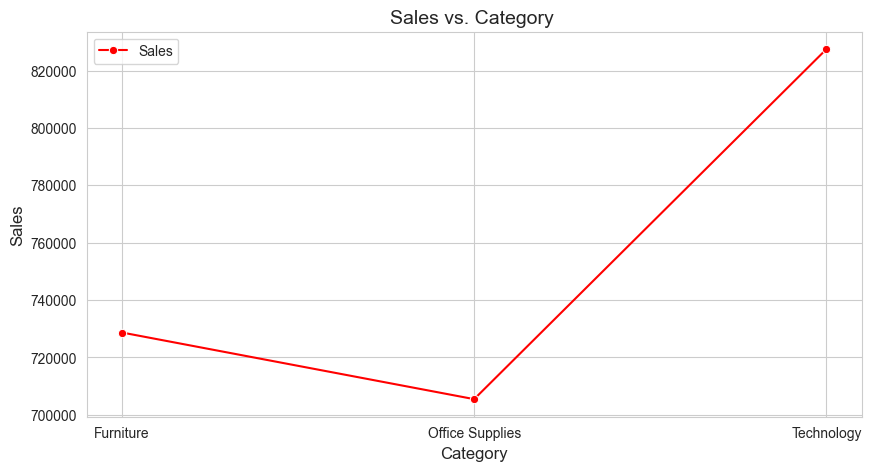

In [79]:
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

data_grouped1 = data.groupby('Category', as_index=False)['Sales'].sum()
# Plot Sales vs. Category
sns.lineplot(x=data_grouped1['Category'], y=data_grouped1['Sales'], marker='o', label="Sales", color='red')


# Customize Plot
plt.title("Sales vs. Category ", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.show()


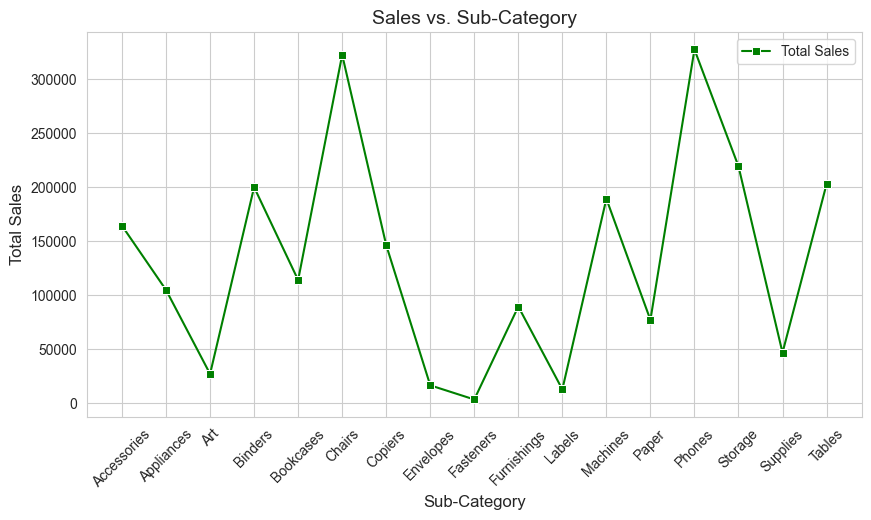

In [ ]:

sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

# Group by 'Sub-Category' and sum Sales
data_grouped = data.groupby('Sub-Category', as_index=False)['Sales'].sum()

# Plot grouped Sales vs. Sub-Category
sns.lineplot(x=data_grouped['Sub-Category'], y=data_grouped['Sales'], marker='s', label="Total Sales", color='green')

# Customize Plot
plt.title("Sales vs. Sub-Category", fontsize=14)
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend()

# Show Plot
plt.show()



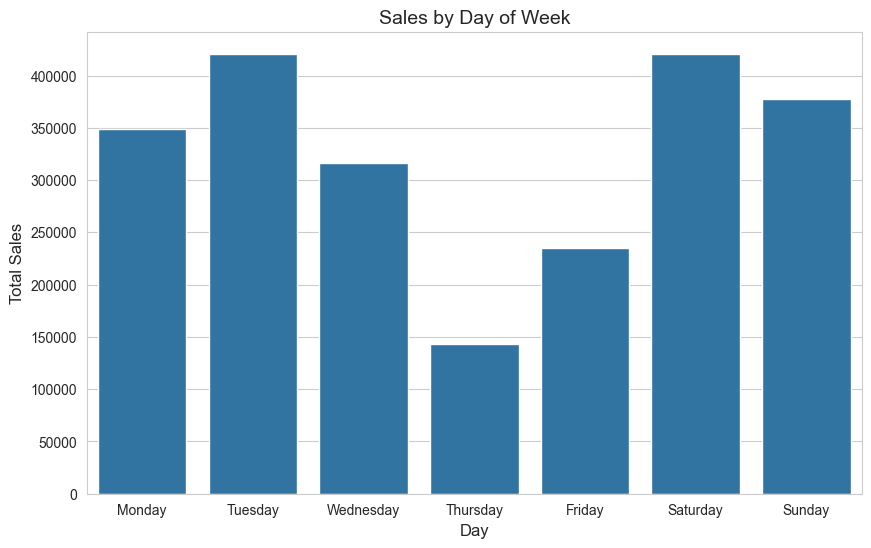

In [69]:
# Day in a week  wise sales


plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Sales by Day of Week", fontsize=14)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

C:\Users\abhay\AppData\Local\Temp\ipykernel_32148\111710595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_sale_month.index, y=max_sale_month.values,


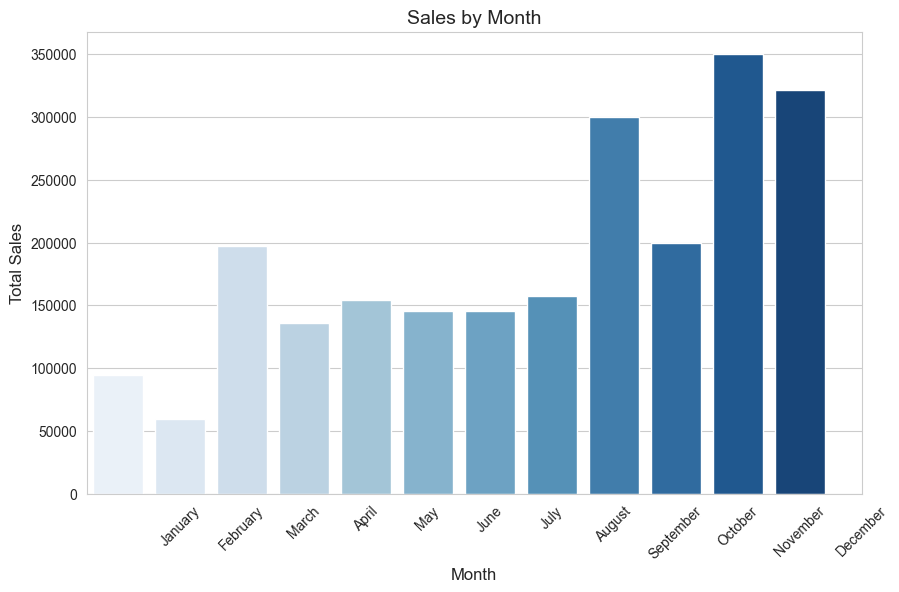

In [86]:


# Group by 'Order Month' and sum Sales
max_sale_month = data.groupby('Order Month')['Sales'].sum()

# Month mapping if 'Order Month' contains numbers (1-12)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Create figure
plt.figure(figsize=(10, 6))

# Plot Sales by Month
sns.barplot(x=max_sale_month.index, y=max_sale_month.values, 
            order=range(1, 13), palette="Blues")  # Ensure order is correct

# Customize Plot
plt.xticks(ticks=range(1, 13), labels=month_order, rotation=45)  # Properly label months
plt.title("Sales by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Show plot
plt.show()


C:\Users\abhay\AppData\Local\Temp\ipykernel_32148\3028009278.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_max_sell.index, y=data_max_sell.values, palette="Blues")


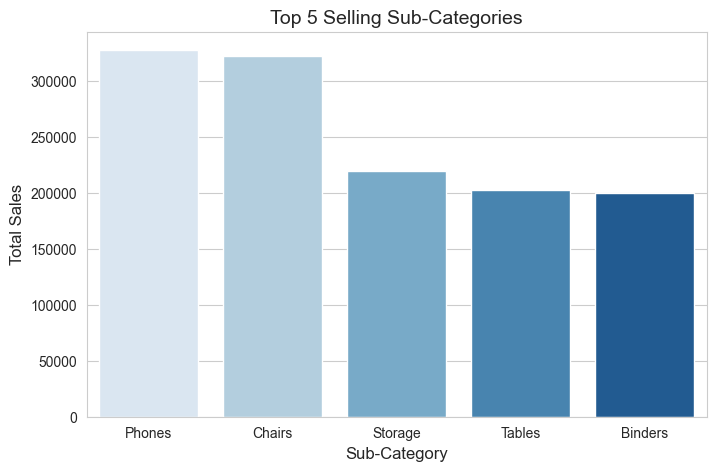

In [98]:
data_max_sell = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))

# Corrected bar plot
sns.barplot(x=data_max_sell.index, y=data_max_sell.values, palette="Blues")

# Customize Plot
plt.title("Top 5 Selling Sub-Categories", fontsize=14)
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Show plot
plt.show()


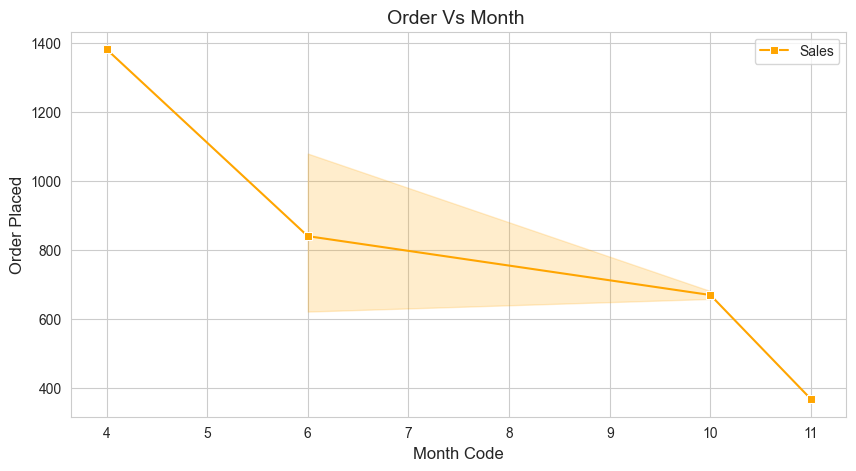

In [76]:
#  Month wise Orders Demand 

sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))


# Plot order demand  vs Month
order_data = data.groupby('Order Month')['Order ID'].count().sort_index()

sns.lineplot(x=data['Order Month'], y=order_data, marker='s', label="Sales", color='orange')

# Customize Plot
plt.title("Order Vs Month ", fontsize=14)
plt.xlabel("Month Code", fontsize=12)
plt.ylabel("Order Placed", fontsize=12)
plt.legend()
plt.show()

C:\Users\abhay\AppData\Local\Temp\ipykernel_32148\723549084.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=order_placed.index, x=order_placed.values, palette='Blues')


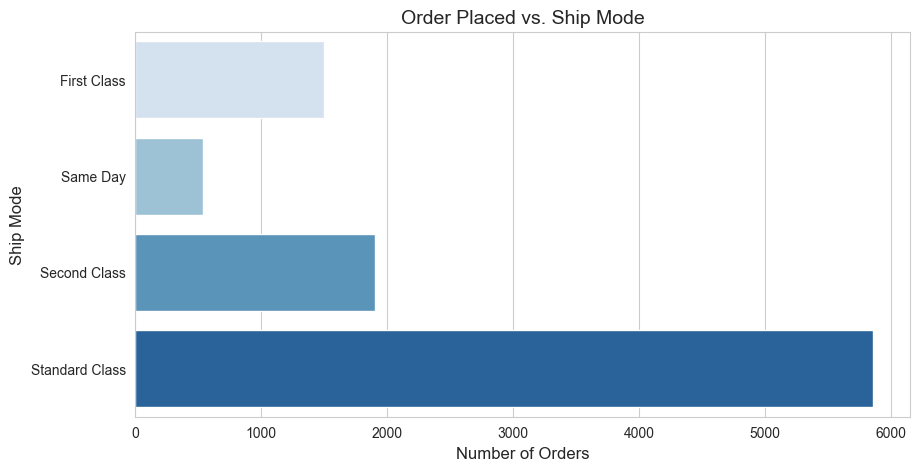

In [91]:
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

# Group by Ship Mode and count orders
order_placed = data.groupby('Ship Mode')['Order ID'].count()

# Plot
sns.barplot(y=order_placed.index, x=order_placed.values, palette='Blues')

# Customize Plot
plt.title("Order Placed vs. Ship Mode", fontsize=14)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Ship Mode", fontsize=12)

plt.show()


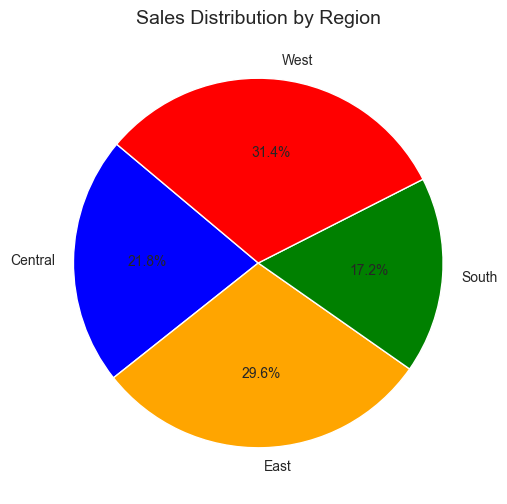

In [40]:
#  classififation which region have max sales 

plt.figure(figsize=(6, 6))

# Group sales by region
region_sales = data.groupby('Region')['Sales'].sum()

# Pie chart
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', 
        colors=['blue', 'orange', 'green', 'red'], startangle=140)

# Add Title
plt.title("Sales Distribution by Region", fontsize=14)

# Show Plot
plt.show()


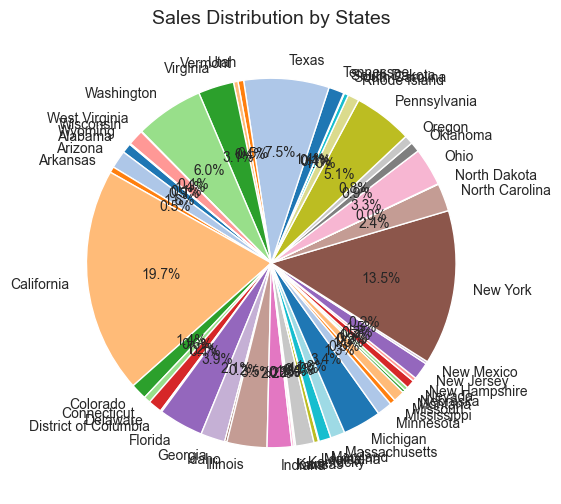

In [49]:


plt.figure(figsize=(6, 6))

# Group sales by states
State_sales = data.groupby('State')['Sales'].sum()

# Generate 49 unique colors using Seaborn's color palette
colors = sns.color_palette('tab20', n_colors=len(State_sales))

# Pie chart
plt.pie(State_sales, labels=State_sales.index, autopct='%1.1f%%', 
        colors=colors, startangle=140)

# Add Title
plt.title("Sales Distribution by States", fontsize=14)

# Show Plot
plt.show()


In [44]:
len(data['State'].unique())

49